<h1 class="intro_title" style="text-align:center; font-size: 45px;">Python course 2021</h1>
<h2 class="intro_subtitle" style="text-align:center; font-size: 30px;">Introduction to machine learning<br/> with Keras</h2>

<img class="intro_logo" style="width:400px" src="https://static.poul.org/assets/logo/logo_text_g.svg" alt="POuL logo"/>

<p class="intro_author" style="text-align: center; font-size: 18px;">Roberto Bochet &lt;avrdudo@poul.org&gt;</p>

## What is machine learning?
##### (as basic as possible)
<small style="font-size: 0.5em;">Engineers, mathematicians and scientists have mercy of me!</small>

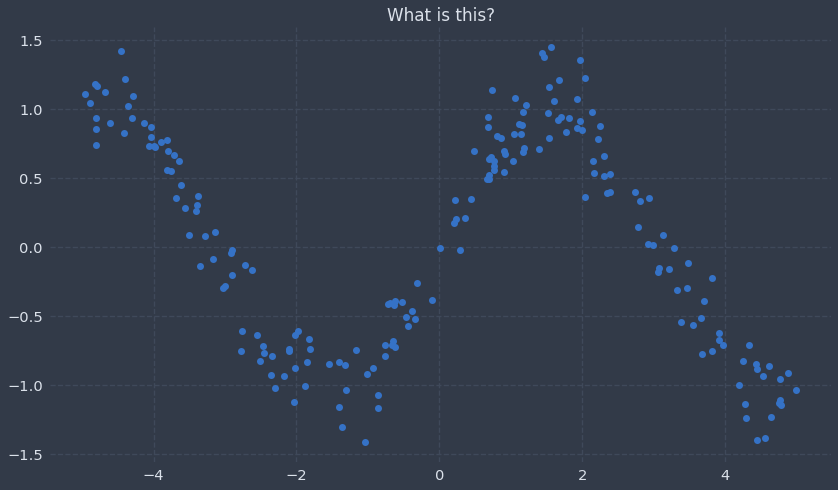

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import math
np.random.seed(0)
f = lambda x: np.real((math.e**(1j*x) - math.e**(-1j*x))/2j) + \
              1e-4*np.e**x + np.random.normal(0,0.2,len(x))
x = np.random.uniform(-5,5, 200)
y = f(x) 
plt.title("What is this?")
plt.plot(x, y, "o")
plt.show()

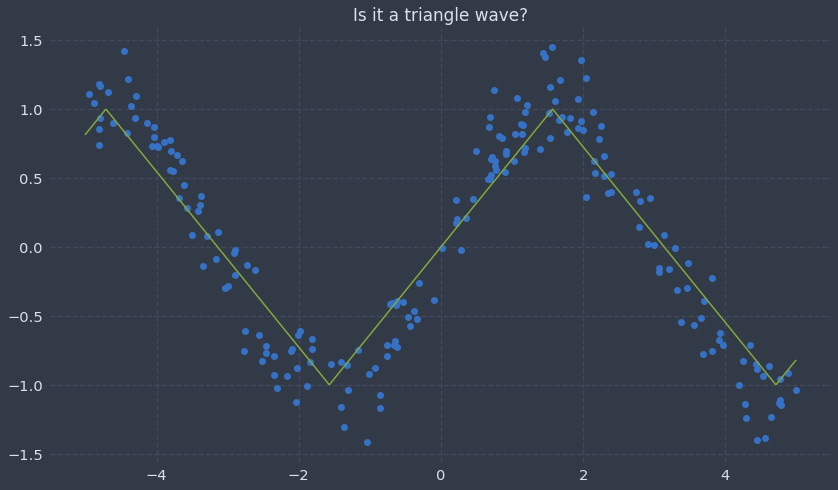

In [104]:
import scipy as sp
#from scipy import signal
x_fin = np.arange(-5, 5, 0.01)
f_tri = lambda x: 2*np.abs(sp.signal.sawtooth(x - np.pi/2)) - 1
plt.title("Is it a triangle wave?")
plt.plot(x, y.real, "o")
plt.plot(x_fin, f_tri(x_fin), "g")
plt.show()

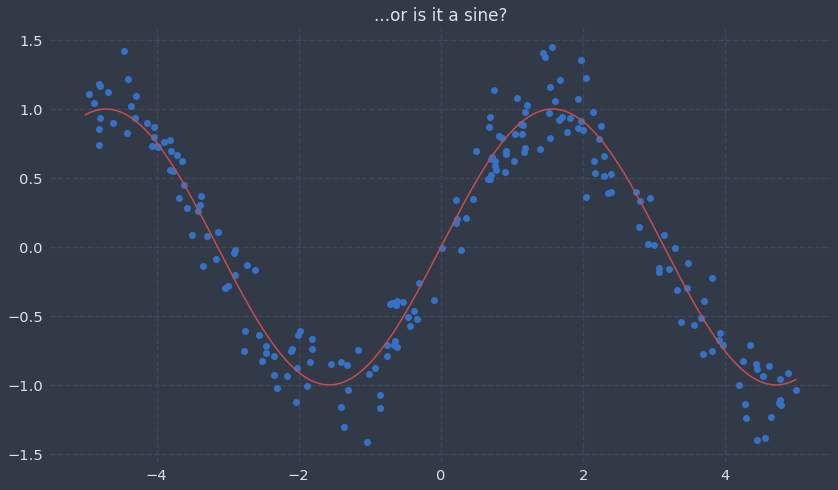

In [105]:
f_sin = lambda x: np.sin(x)
plt.title("...or is it a sine?")
plt.plot(x, y.real, "o")
plt.plot(x_fin, f_sin(x_fin), "r")
plt.show()

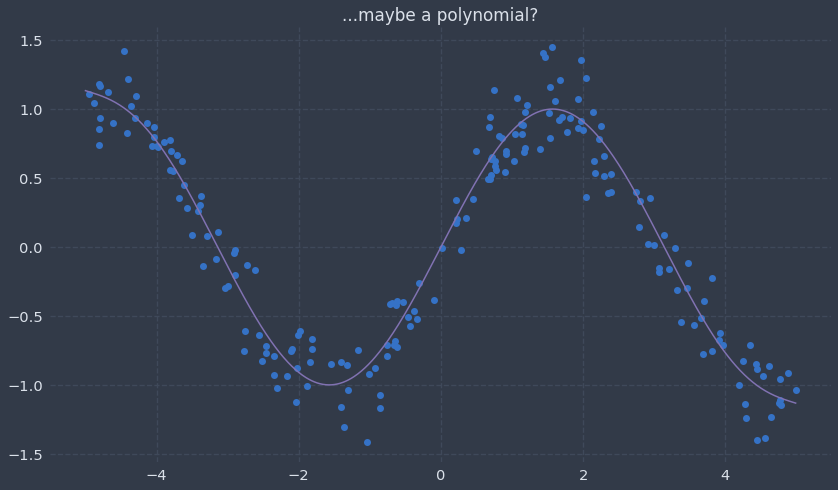

In [106]:
f_poly = lambda x: x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 - x**11/39916800
plt.title("...maybe a polynomial?")
plt.plot(x, y, "o")
plt.plot(x_fin, f_poly(x_fin), "m")
plt.show()

#### What are `triangle wave`, `sine` or `polynomial`?
##### (Recap)

We had some data in the form of tuple `(x,y)`

We notice that there is a kind of relation between `x` and `y`, they are not random (mostly)

So, we asked ourselves what value `y` assumes given a generic value of `x` (not presents in the orginal dataset)

We answered with some mathematical functions which seems approximate the data quite well

#### So, from which among the suggested functions the dataset are generated?

### Short answer: From nothing of them

In a real scenario is unrealistic to completely identify the "real process" behind a dataset

A **mathematical system can provides nothing more than an approximation of a real system**  
and this is true for all the real system

### The mathematical functions  
### we considered are called **mathematical models**
an alternative to mathematical models could be the **physical models**

So, a rasonable question we should answer could be  
**"Which mathematical model approximates better the behaviour of our real system?"**

# Machine learning

>is the study of **computer algorithms** that  
    improve **automatically** through **experience**  
    and by the use of data.  
>
>    &#91;...&#93;  
>
>Machine learning algorithms build a model based  
    on sample data, &#91;...&#93; in order to make **prediction**  
    or **decisions** without being  
    **explicitly programmed to do so**.  
>
>[from wikipedia](https://en.wikipedia.org/wiki/Machine_learning)

## ML branches

ML splits itself in three macro areas

*(incredible simplified summary)*

### Reinforced learning
The model is trained like you would do with a pet:  
it does a good job it is rewarded,  
it does a mistake it is punished.

The model should try to maximize the reward and avoid the punishes,  
consequentially it would learn to do a good job without makes mistakes.

Some applications:  
[songs suggestion](https://medium.com/analytics-vidhya/emotion-based-music-recommendation-system-using-a-deep-reinforcement-learning-approach-6d23a24d3044),
[autonomous drive](https://towardsdatascience.com/do-you-want-to-train-a-simplified-self-driving-car-with-reinforcement-learning-be1263622e9e)

### Supervised learning
To the model is provided the input data and the result we would expect from it.

The model should learn and generalize the relation between input and output,  
so that given a never seen input it can be provided a reasonable output.

Some applications:  
[text translation](https://towardsdatascience.com/language-translation-with-rnns-d84d43b40571),
[image classification](https://developers.google.com/machine-learning/practica/image-classification)

### Unsupervised learning
To the model are provided only the input data, without what we want aspect as output,  
will be the model that will identify scheme and recurrences in the data.

Some applications:  
[paints style transfer](https://github.com/jcjohnson/neural-style),
[words embedding](https://nlp.stanford.edu/projects/glove/)

It could be that for complex problems they are used together.

#### However today we talk about **supervised learning**!

# Feed-forward Neural Network

# Our first FNN
As first experiment, we resume the first dataset we saw at the start of this talk  
and let us try to build, train and validate a FNN on it.

### First step, split dataset in 

In [94]:
import tensorflow.keras as kr

model = kr.Sequential()

model.add(kr.layers.InputLayer(input_shape=(1,)))
model.add(kr.layers.Dense(30, activation=kr.activations.sigmoid))
model.add(kr.layers.Dense(10, activation=kr.activations.sigmoid))
model.add(kr.layers.Dense(1, activation=kr.activations.linear))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_34 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(
    optimizer=kr.optimizers.Adam(learning_rate=1e-3),
    loss=kr.losses.mean_squared_error,
    #metrics=[kr.losses.mean_squared_error]
)

In [96]:
import sklearn as skl
import sklearn.model_selection as ms
train_x, val_x, train_y, val_y = skl.model_selection.train_test_split(x, y,
                                                                      train_size=0.7,
                                                                      random_state=0)

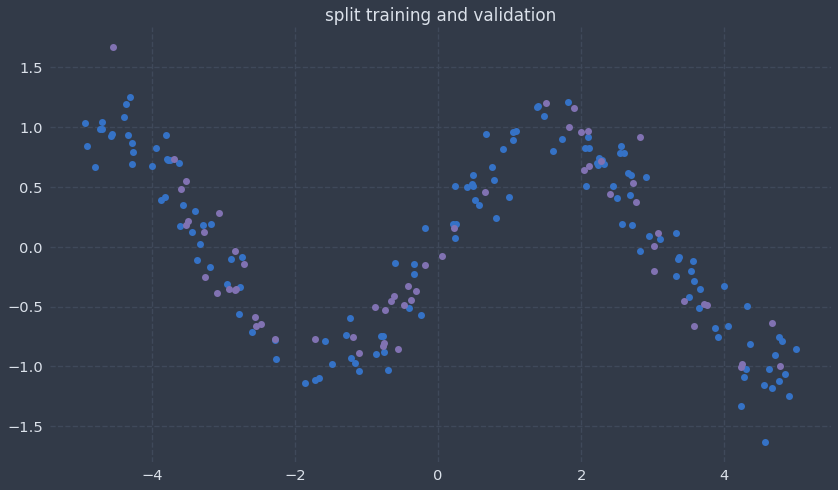

In [97]:
plt.title("split training and validation")
plt.plot(train_x, train_y, "o")
plt.plot(val_x, val_y, "om")
plt.show()

In [100]:
model.fit(train_x, train_y, #batch_size=200,
          validation_data=(val_x, val_y), epochs=750)

Epoch 1/750
5/5 [==============================] - 0s 17ms/step - loss: 0.1146 - val_loss: 0.1115
Epoch 2/750
5/5 [==============================] - 0s 8ms/step - loss: 0.1137 - val_loss: 0.1105
Epoch 3/750
5/5 [==============================] - 0s 8ms/step - loss: 0.1136 - val_loss: 0.1079
Epoch 4/750
5/5 [==============================] - 0s 8ms/step - loss: 0.1118 - val_loss: 0.1096
Epoch 5/750
5/5 [==============================] - 0s 7ms/step - loss: 0.1112 - val_loss: 0.1101
Epoch 6/750
5/5 [==============================] - 0s 8ms/step - loss: 0.1105 - val_loss: 0.1084
Epoch 7/750
5/5 [==============================] - 0s 8ms/step - loss: 0.1095 - val_loss: 0.1067
Epoch 8/750
5/5 [==============================] - 0s 9ms/step - loss: 0.1085 - val_loss: 0.1042
Epoch 9/750
5/5 [==============================] - 0s 6ms/step - loss: 0.1084 - val_loss: 0.1019
Epoch 10/750
5/5 [==============================] - 0s 10ms/step - loss: 0.1078 - val_loss: 0.1033
Epoch 11/750
5/5 [=========

5/5 [==============================] - 0s 8ms/step - loss: 0.0649 - val_loss: 0.0810
Epoch 168/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0651 - val_loss: 0.0812
Epoch 169/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0647 - val_loss: 0.0804
Epoch 170/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0643 - val_loss: 0.0801
Epoch 171/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0655 - val_loss: 0.0802
Epoch 172/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0653 - val_loss: 0.0799
Epoch 173/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0645 - val_loss: 0.0800
Epoch 174/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0640 - val_loss: 0.0799
Epoch 175/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0638 - val_loss: 0.0799
Epoch 176/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0639 - val_loss: 0.0799
Epoch 177/750
5/5 [=====

Epoch 250/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0571 - val_loss: 0.0715
Epoch 251/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0575 - val_loss: 0.0719
Epoch 252/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0582 - val_loss: 0.0717
Epoch 253/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0580 - val_loss: 0.0710
Epoch 254/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0570 - val_loss: 0.0708
Epoch 255/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0570 - val_loss: 0.0707
Epoch 256/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0569 - val_loss: 0.0706
Epoch 257/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0570 - val_loss: 0.0705
Epoch 258/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0567 - val_loss: 0.0705
Epoch 259/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0569 - val_loss: 0.0704
Epoch 260/

Epoch 415/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0497 - val_loss: 0.0586
Epoch 416/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0494 - val_loss: 0.0584
Epoch 417/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0492 - val_loss: 0.0585
Epoch 418/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0494 - val_loss: 0.0585
Epoch 419/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0494 - val_loss: 0.0583
Epoch 420/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0496 - val_loss: 0.0584
Epoch 421/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0495 - val_loss: 0.0584
Epoch 422/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0497 - val_loss: 0.0583
Epoch 423/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0493 - val_loss: 0.0585
Epoch 424/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0494 - val_loss: 0.0592
Epoch 425/

Epoch 580/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0465 - val_loss: 0.0528
Epoch 581/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0466 - val_loss: 0.0527
Epoch 582/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0468 - val_loss: 0.0525
Epoch 583/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0469 - val_loss: 0.0533
Epoch 584/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0468 - val_loss: 0.0529
Epoch 585/750
5/5 [==============================] - 0s 9ms/step - loss: 0.0464 - val_loss: 0.0529
Epoch 586/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0475 - val_loss: 0.0536
Epoch 587/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0473 - val_loss: 0.0529
Epoch 588/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0466 - val_loss: 0.0542
Epoch 589/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0474 - val_loss: 0.0538
Epoch 590/

Epoch 745/750
5/5 [==============================] - 0s 9ms/step - loss: 0.0456 - val_loss: 0.0506
Epoch 746/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0458 - val_loss: 0.0505
Epoch 747/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0458 - val_loss: 0.0508
Epoch 748/750
5/5 [==============================] - 0s 9ms/step - loss: 0.0460 - val_loss: 0.0513
Epoch 749/750
5/5 [==============================] - 0s 8ms/step - loss: 0.0456 - val_loss: 0.0508
Epoch 750/750
5/5 [==============================] - 0s 7ms/step - loss: 0.0456 - val_loss: 0.0502


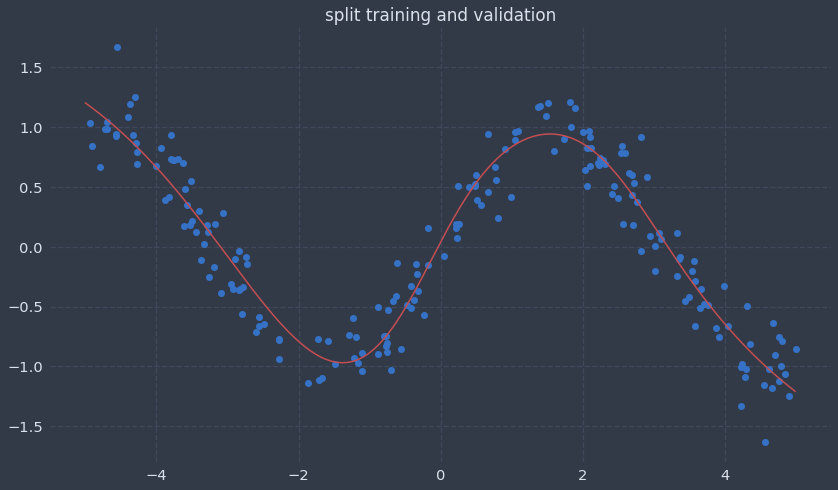

In [101]:
x_pred = np.arange(-5, 5, 0.01)
y_pred = model.predict(x_pred)

plt.title("split training and validation")
plt.plot(x, y, "o")
plt.plot(x_pred, y_pred, "r")
plt.show()

<h1 class="outro_title" style="text-align:center; font-size: 35px;">Thank you!</h1>

<img class="outro_logo" style="width: 20%;" src="https://static.poul.org/assets/logo/logo_g.svg" alt="POuL logo">

<a class="outro_license" style="display: block; margin: 20px auto;" rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>
<p class="outro_license_text" style="font-size: 15px; text-align: center;">Licensed under Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International</p>

<p class="outro_author" style="text-align: center; font-size: 18px;">Roberto Bochet &lt;avrdudo@poul.org&gt;</p>